core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '31', '10', '63', '16'

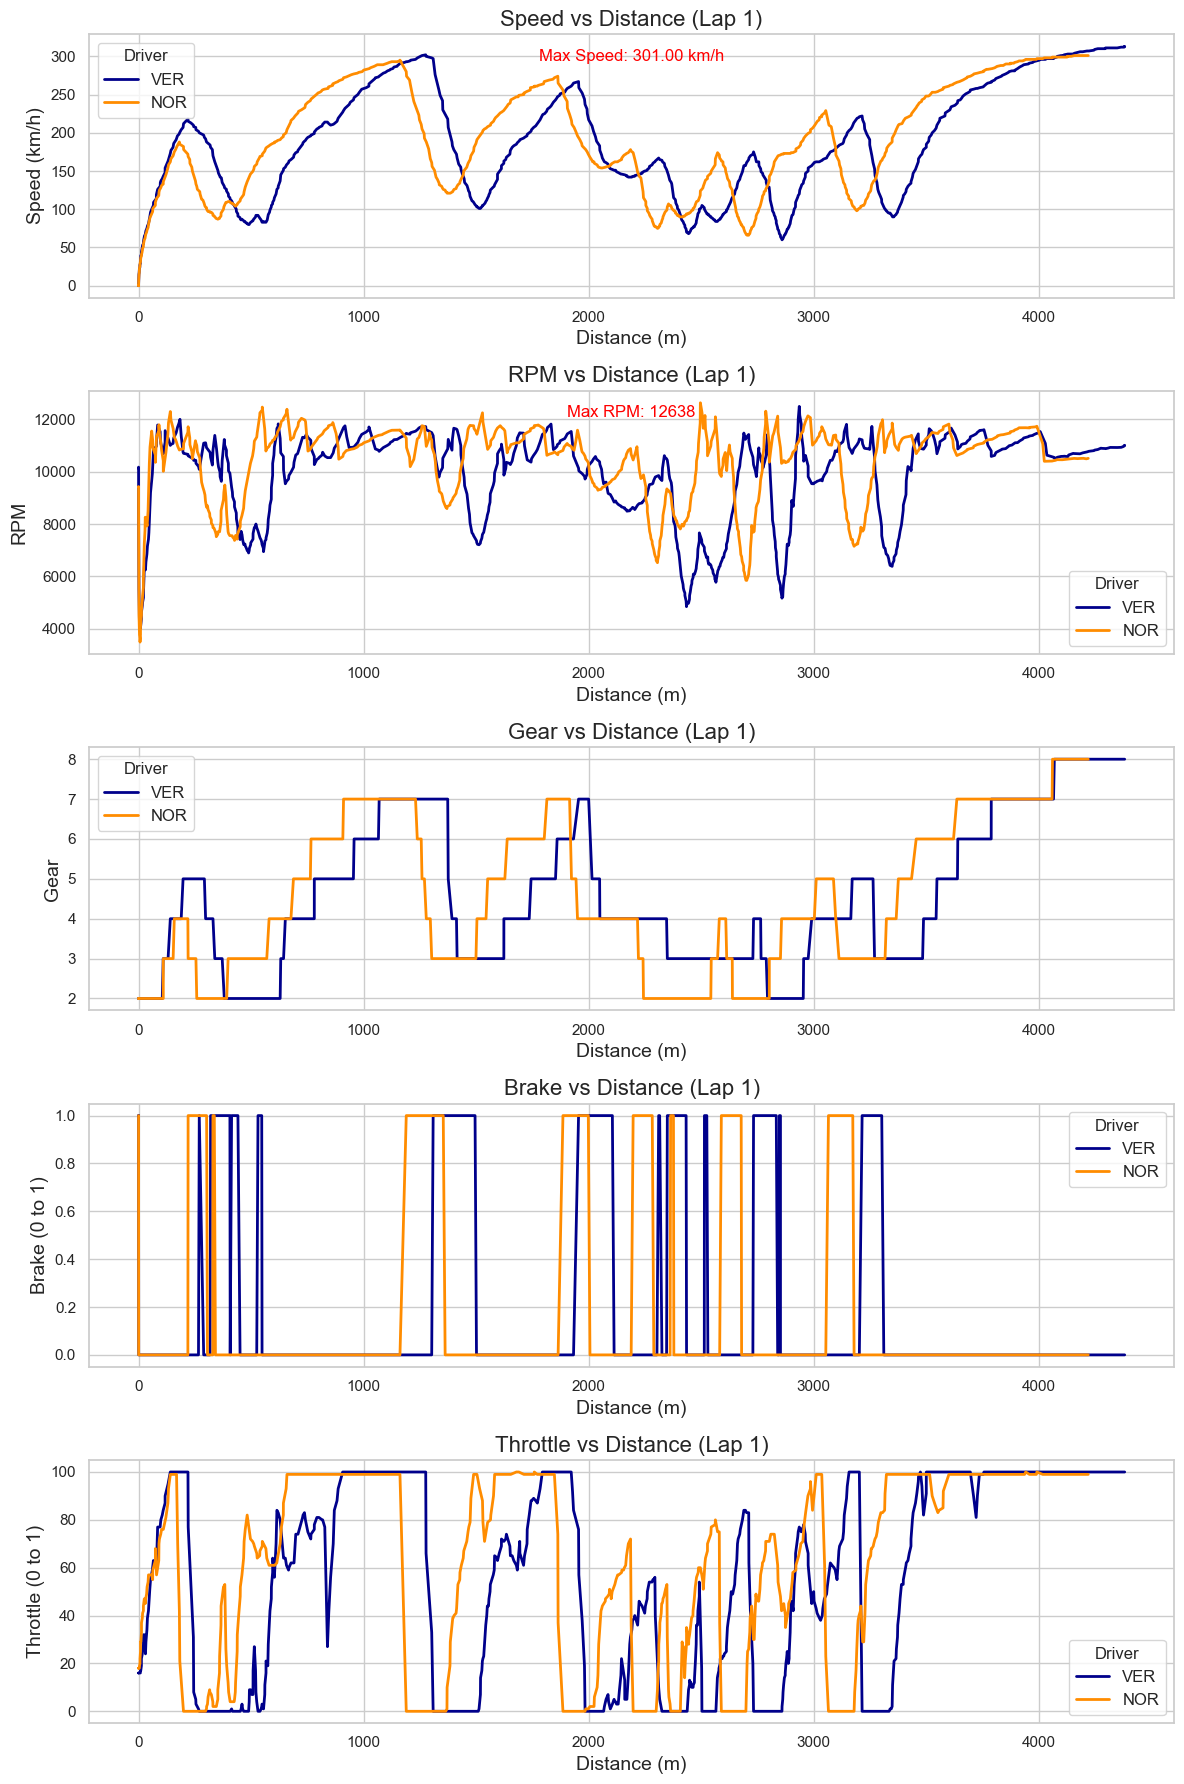

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


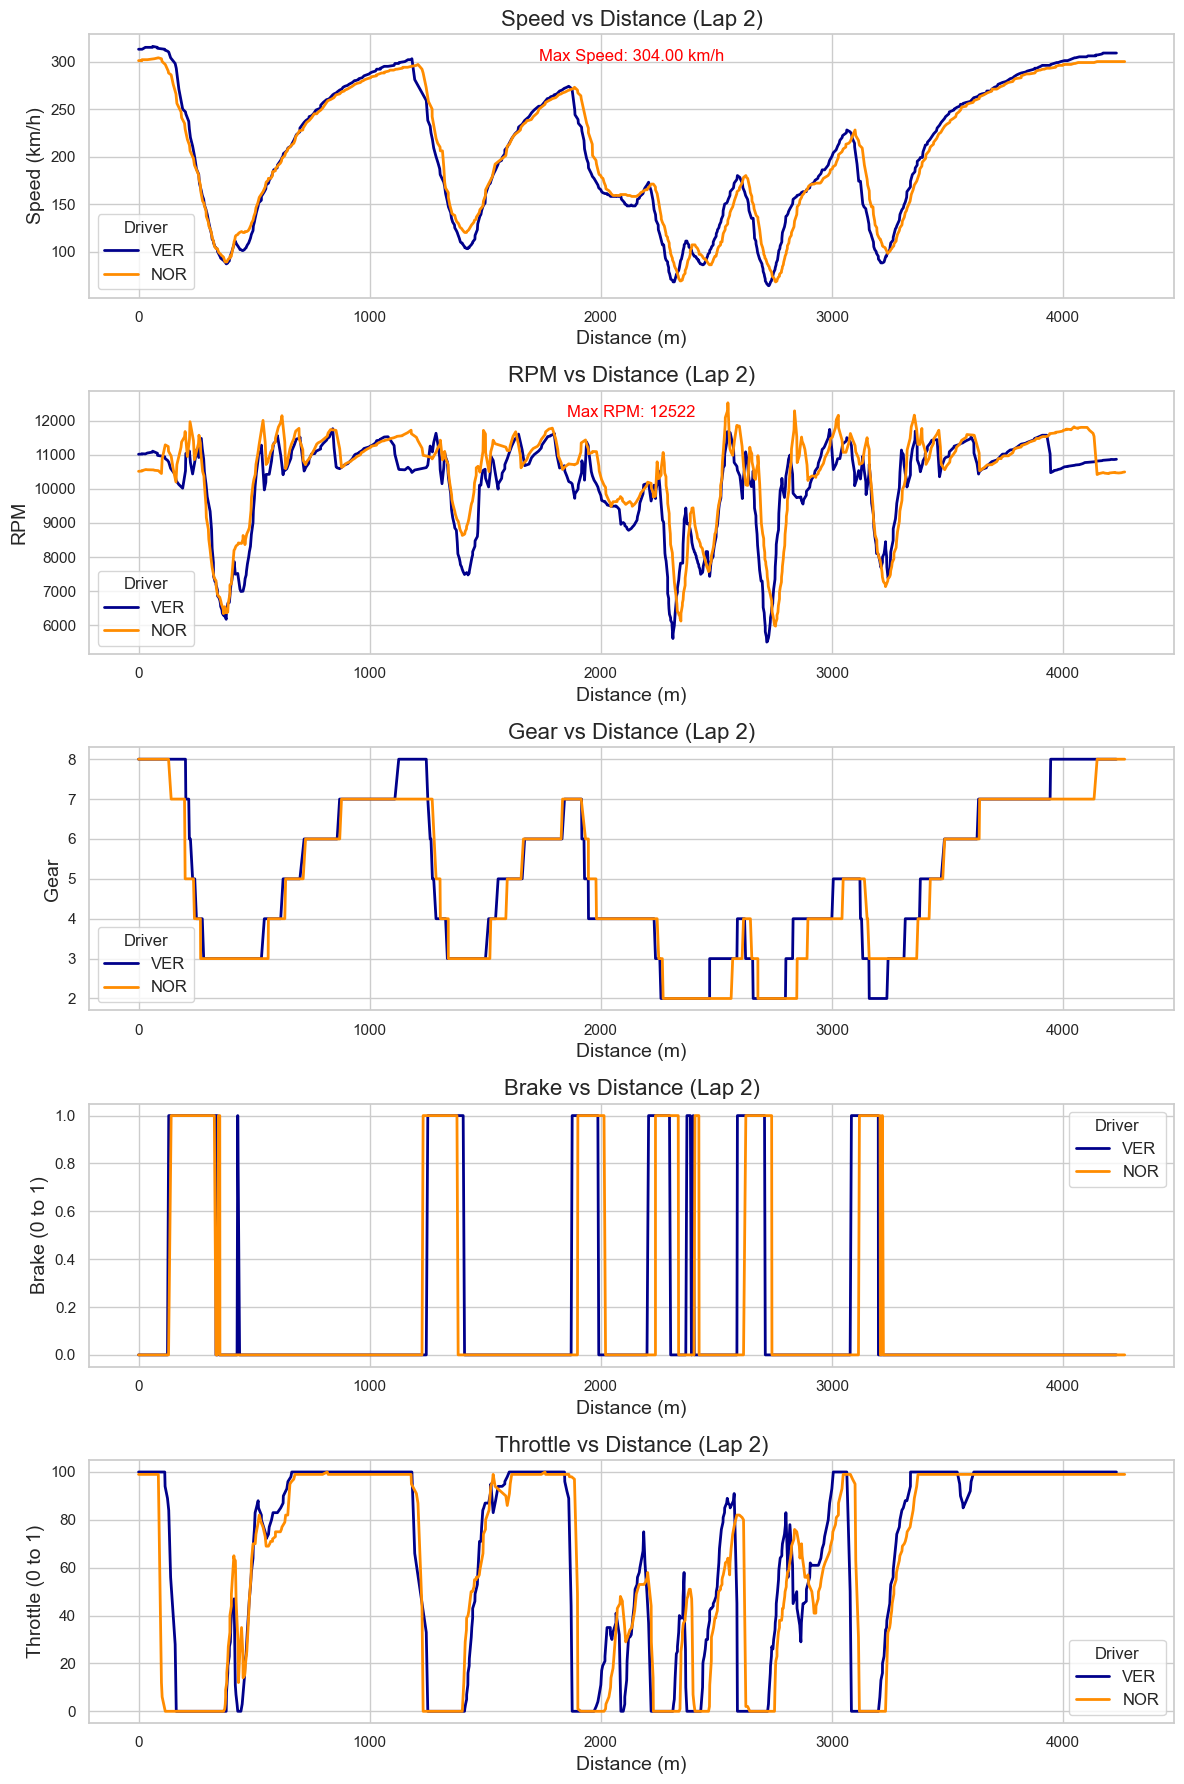

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


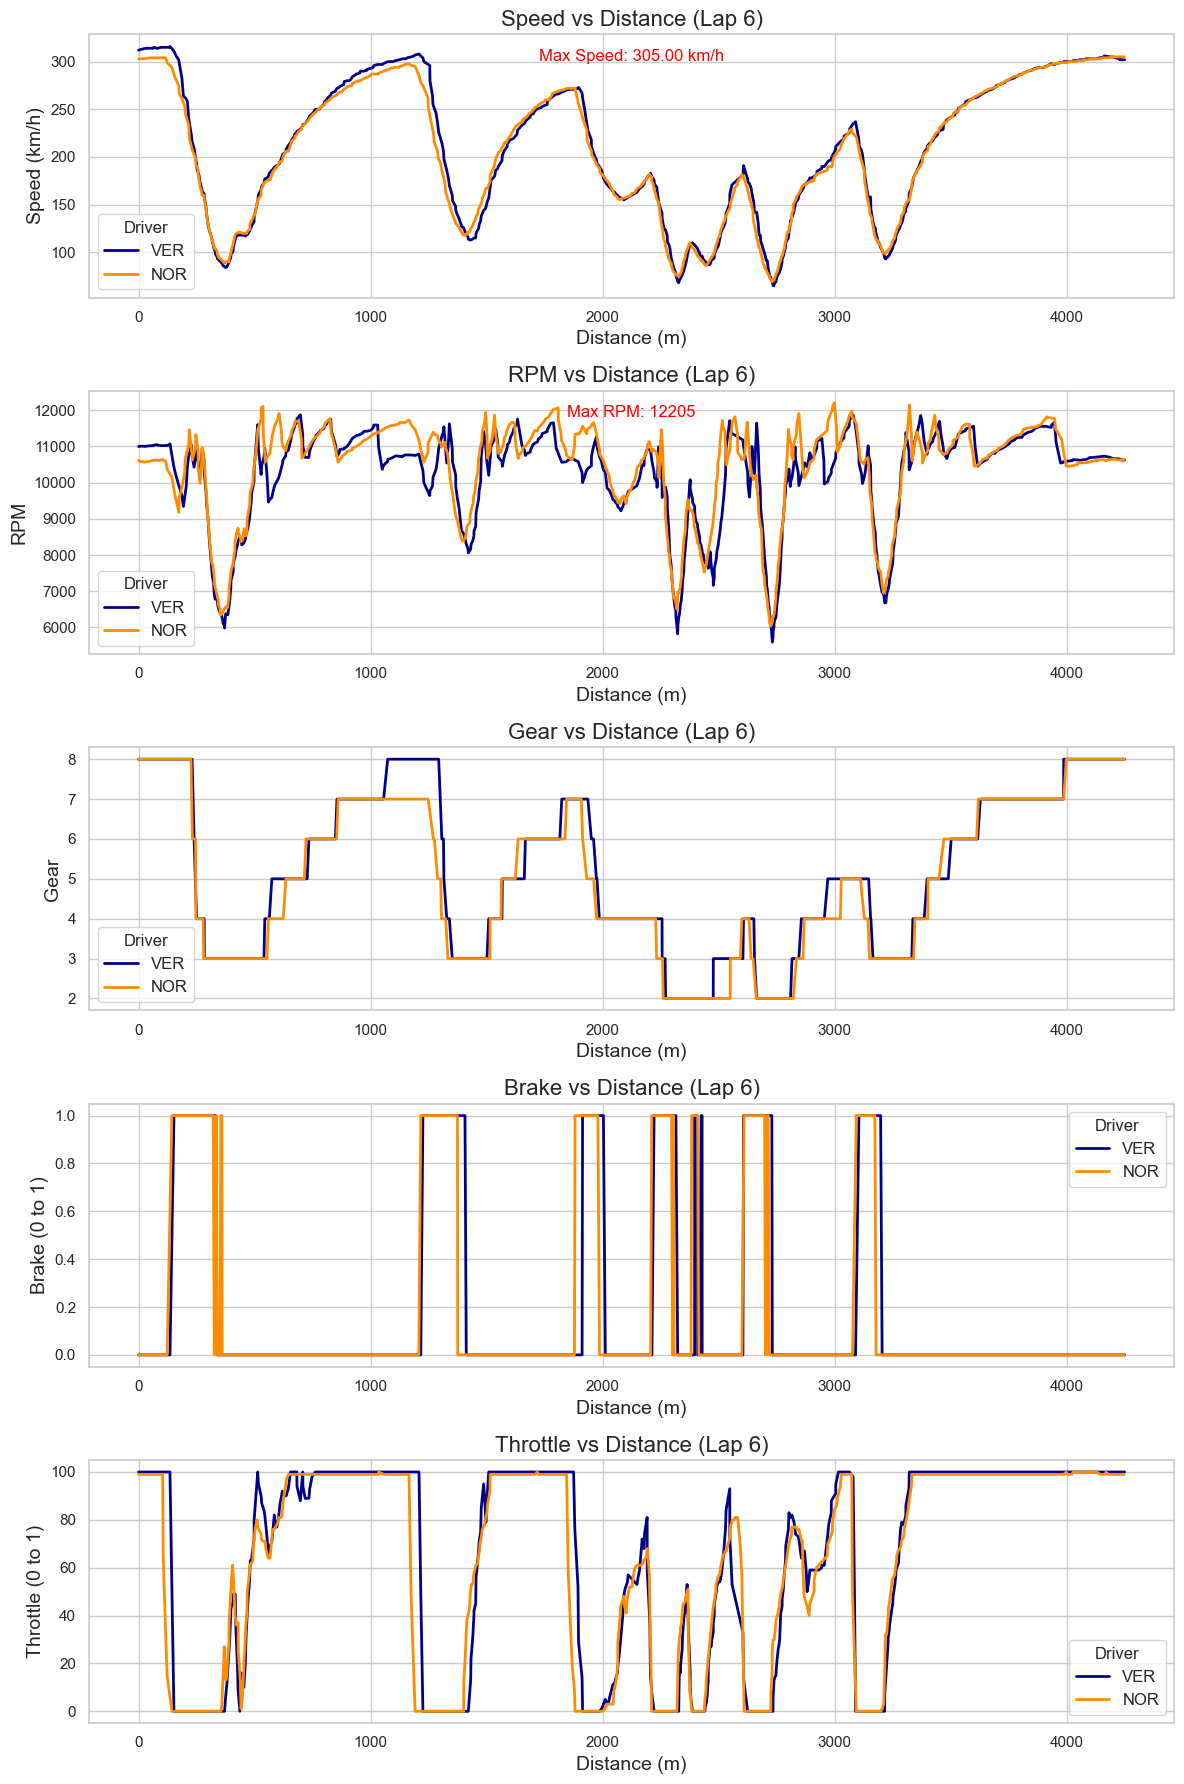

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


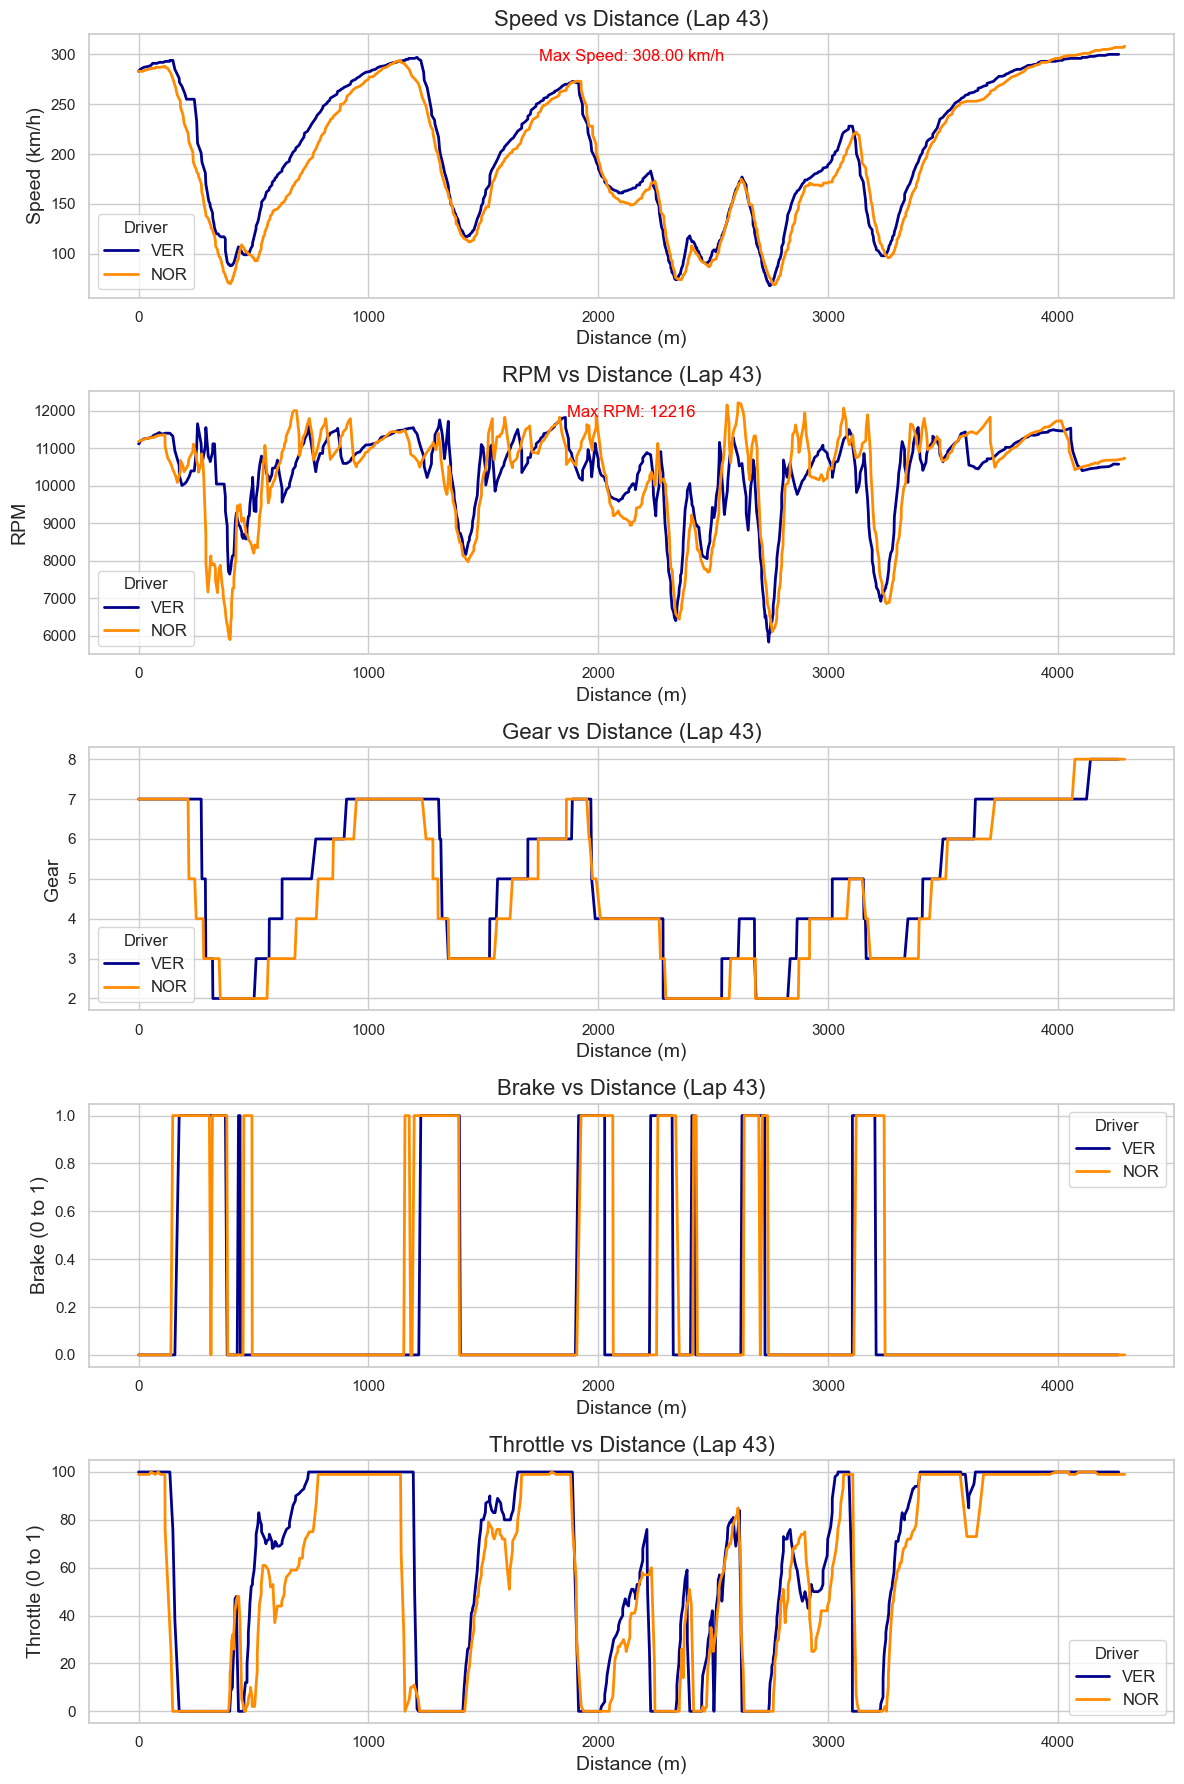

In [15]:
import fastf1
import matplotlib.pyplot as plt
import seaborn as sns

# Enable caching to speed up data loading
fastf1.Cache.enable_cache('D:/F1_Vizs/F1/f1_env/cache')

# 2024 Brazilian Grand Prix (Round 21)
year = 2024
race_round = 21

# Get the race(R) session
session = fastf1.get_session(year, race_round, 'R')  # 'R' stands for the race session

# Load the session data
session.load()

# get lap data
laps = session.laps

# Filter data for Max Verstappen (Driver 'VER') and Lando Norris (Driver 'NOR') for laps 1, 2, 6, and 43
laps_to_analyze = [1, 2, 6, 43]
drivers = ['VER', 'NOR']

# Filter laps data for both drivers
selected_laps = laps[laps['Driver'].isin(drivers)]
selected_laps = selected_laps[selected_laps['LapNumber'].isin(laps_to_analyze)]

# Set Seaborn style
sns.set(style="whitegrid")

# Define distinct colors for each driver
driver_colors = {'VER': 'darkblue', 'NOR': 'darkorange'}

# Loop through each lap and create a separate visualization for each lap
for lap_num in laps_to_analyze:
    fig, axes = plt.subplots(5, 1, figsize=(12, 18))
    
    # Loop over each driver to get telemetry data for the selected lap
    for driver in drivers:
        # Filter the selected laps for the current driver and lap number
        lap = selected_laps[(selected_laps['LapNumber'] == lap_num) & (selected_laps['Driver'] == driver)].iloc[0]
        
        # Get telemetry data for the selected lap
        lap_telemetry = lap.get_telemetry()

        # Plot Speed
        axes[0].plot(lap_telemetry['Distance'], lap_telemetry['Speed'], label=f'{driver}', color=driver_colors[driver], linewidth=2)
        
        # Plot RPM
        axes[1].plot(lap_telemetry['Distance'], lap_telemetry['RPM'], label=f'{driver}', color=driver_colors[driver], linewidth=2)
        
        # Plot Gear
        axes[2].plot(lap_telemetry['Distance'], lap_telemetry['nGear'], label=f'{driver}', color=driver_colors[driver], linewidth=2)
        
        # Plot Brake
        axes[3].plot(lap_telemetry['Distance'], lap_telemetry['Brake'], label=f'{driver}', color=driver_colors[driver], linewidth=2)
        
        # Plot Throttle
        axes[4].plot(lap_telemetry['Distance'], lap_telemetry['Throttle'], label=f'{driver}', color=driver_colors[driver], linewidth=2)

    # Customize the plots for the current lap
    axes[0].set_title(f"Speed vs Distance (Lap {lap_num})", fontsize=16)
    axes[0].set_ylabel("Speed (km/h)", fontsize=14)
    axes[0].legend(title="Driver", fontsize=12)
    axes[0].grid(True)

    axes[1].set_title(f"RPM vs Distance (Lap {lap_num})", fontsize=16)
    axes[1].set_ylabel("RPM", fontsize=14)
    axes[1].legend(title="Driver", fontsize=12)
    axes[1].grid(True)

    axes[2].set_title(f"Gear vs Distance (Lap {lap_num})", fontsize=16)
    axes[2].set_ylabel("Gear", fontsize=14)
    axes[2].legend(title="Driver", fontsize=12)
    axes[2].grid(True)

    axes[3].set_title(f"Brake vs Distance (Lap {lap_num})", fontsize=16)
    axes[3].set_ylabel("Brake (0 to 1)", fontsize=14)
    axes[3].legend(title="Driver", fontsize=12)
    axes[3].grid(True)

    axes[4].set_title(f"Throttle vs Distance (Lap {lap_num})", fontsize=16)
    axes[4].set_ylabel("Throttle (0 to 1)", fontsize=14)
    axes[4].legend(title="Driver", fontsize=12)
    axes[4].grid(True)

    # Set the common X axis label
    for ax in axes:
        ax.set_xlabel("Distance (m)", fontsize=14)

    # Add annotations for key points (example: max speed, max RPM)
    max_speed = lap_telemetry['Speed'].max()
    max_rpm = lap_telemetry['RPM'].max()
    axes[0].annotate(f'Max Speed: {max_speed:.2f} km/h', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')
    axes[1].annotate(f'Max RPM: {max_rpm:.0f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')

    # Show the plots for the current lap
    plt.tight_layout()
    plt.show()
